# Feuille de travaux pratiques. Méthodes directes de résolution des systèmes linéaires

In [2]:
# chargement des bibliothèques
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

## Exercice 1 (factorisation LU)
On rappelle que le procédé d'élimination de Gauss sans échange, lorsqu'il est applicable à une matrice réelle carrée inversible $A$, s'interprète comme un procédé de factorisation de $A$ sous la forme d'un produit $LU$, où la matrice $L$ est triangulaire inférieure, à éléments diagonaux tous égaux à $1$ et la matrice $U$ est triangulaire supérieure.

**1.** En se servant des formules vues en cours, écrire une fonction `LU`, prenant en argument un tableau contenant la matrice $A$ et retournant les matrices $L$ et $U$ de la factorisation $A=LU$, toutes deux stockées dans un tableau de même taille que celui contenant $A$. On rappelle que les éléments diagonaux de la matrice $L$ étant connus a priori, il n'est pas utile de les stocker.

In [3]:
def LU(A):
# calcul de la factorisation LU d'une matrice carrée (version "kji")
    m,n=A.shape
    if m!=n:
        raise ValueError('La matrice n\'est pas carrée.')
    factLU=A.copy()
    for k in range(n-1):
        if factLU[k,k]!=0:
            for i in range(k+1,n):
                factLU[i,k]=factLU[i,k]/factLU[k,k]
                for j in range(k+1,n):
                    factLU[i,j]=factLU[i,j]-factLU[i,k]*factLU[k,j]
        else:
            raise ValueError('Le ',k+1,'ème pivot est nul.')
    return factLU

**2.** Utiliser cette fonction pour calculer la décomposition LU de la matrice
$$
A=
\begin{pmatrix}1&4&7\\2&5&8\\3&6&10\\
\end{pmatrix}.
$$

In [4]:
A=np.array([[1.,4.,7.],[2.,5.,8.],[3.,6.,10.]])
# factorisation LU de A
factLU=LU(A)
print(factLU)

[[ 1.  4.  7.]
 [ 2. -3. -6.]
 [ 3.  2.  1.]]


**3.** Utiliser cette factorisation pour résoudre le système linéaire $Ax=b$ avec $b=(1,1,1)^\top$. Vérifier que le résultat obtenu est correct en le comparant à celui calculé par la commande `linalg.solve(A,b)` de NumPy.

In [5]:
b=np.array([1.,1.,1.])
n=A.shape[0]
# résolution du système triangulaire Ly=b par une méthode de descente
y=b.copy()
for i in range(n):
    for j in range(i+1,n):
        y[j]=y[j]-factLU[j,i]*y[i]
# résolution du système triangulaire Ux=y par une méthode de remontée
x=np.zeros(n)
for i in range(n-1,-1,-1):
    x[i]=y[i]/factLU[i,i]
    for j in range(i-1,-1,-1):
         y[j]=y[j]-factLU[j,i]*x[i]
print('solution obtenue :',x)
# comparaison de la solution calculée avec celle calculé par NumPy
print('norme de la différence avec la solution de référence :',np.linalg.norm(x-np.linalg.solve(A,b)))

solution obtenue : [-0.33333333  0.33333333  0.        ]
norme de la différence avec la solution de référence : 2.725767734238167e-16


On considère à présent la version du procédé utilisant une stratégie de choix de pivot partiel, ce qui implique de possibles échanges de lignes lors de la factorisation.

**4.** Écrire une fonction `LUP`, prenant en argument un tableau contenant la matrice $A$ et retournant les matrices $P$, $L$ et $U$ de la factorisation $PA=LU$ correspondant à l'utilisation d'une stratégie de choix de pivot partiel. Comme précédemment, les matrices $L$ et $U$ seront toutes deux stockées dans un tableau de même taille que celui contenant $A$, et la matrice de permutation $P$ sera stockées sous la forme d'un tableau indiquant la position des lignes de $A$ dans la matrice $PA$.

In [6]:
def LUP(A):
# calcul de la factorisation LU d'une matrice carrée, avec stratégie de choix de pivot partiel
    m,n=A.shape
    if m!=n:
        raise ValueError('La matrice n\'est pas carrée.')
    factLU=A.copy()
    P=np.arange(0,n)
    for k in range(n-1):
# choix du pivot
        indice_ligne_pivot=np.argmax(abs(factLU[k:n,k]))+k
        P[[k,indice_ligne_pivot]]=P[[indice_ligne_pivot,k]]
        factLU[[k,indice_ligne_pivot],0:n]=factLU[[indice_ligne_pivot,k],0:n]
        if factLU[k,k]!=0:
            for i in range(k+1,n):
                factLU[i,k]=factLU[i,k]/factLU[k,k]
                for j in range(k+1,n):
                    factLU[i,j]=factLU[i,j]-factLU[i,k]*factLU[k,j]
    return [factLU,P]

**5.** Utiliser cette fonction pour la résolution du système linéaire $Ax=b$, avec
$$
A=\begin{pmatrix}3&17&10\\2&4&-2\\6&18&-12\end{pmatrix}\text{ et }b=\begin{pmatrix}1\\2\\3\end{pmatrix}.
$$
Vérifier que le résultat trouvé est correct en le comparant à celui calculé par la commande `linalg.solve(A,b)` de NumPy.

In [7]:
A=np.array([[3.,17.,10.],[2.,4.,-2.],[6.,18.,-12.]])
b=np.array([1.,2.,3.])
# factorisation PA=LU de A
[factLU,P]=LUP(A)
n=A.shape[0]
# permutation du second membre du système
y=b[P]
# résolution du système triangulaire Ly=Pb par une méthode de descente
for i in range(n):
    for j in range(i+1,n):
        y[j]=y[j]-factLU[j,i]*y[i]
# résolution du système triangulaire Ux=y par une méthode de remontée
x=np.zeros(n)
for i in range(n-1,-1,-1):
    x[i]=y[i]/factLU[i,i]
    for j in range(i-1,-1,-1):
         y[j]=y[j]-factLU[j,i]*x[i]
print('solution obtenue :',x)
# comparaison de la solution calculée avec celle calculé par NumPy
print('norme de la différence avec la solution de référence :',np.linalg.norm(x-np.linalg.solve(A,b)))

solution obtenue : [ 1.85416667 -0.35416667  0.14583333]
norme de la différence avec la solution de référence : 0.0


## Exercice 2 (factorisation QR)
La [factorisation QR](https://en.wikipedia.org/wiki/QR_decomposition) est un procédé permettant d'écrire une matrice réelle $A$ sous la forme d'un produit de la forme $A=QR$, dans lequel $Q$ est une matrice orthogonale et $R$ est une matrice triangulaire supérieure. Elle s'applique aussi bien à des matrice réelles carrées que rectangulaires.

On se propose dans cet exercice de mettre en &oelig;uvre la factorisation QR de deux manières distinctes pour des matrices réelles carrées inversibles.

Une première interprétation de la factorisation repose sur le [procédé d'orthonormalisation de Gram-Schmidt](https://en.wikipedia.org/wiki/Gram%E2%80%93Schmidt_process). Les colonnes de la matrice orthogonale $Q$ sont les vecteurs orthonormés obtenus à l'issue de l'application du procédé à la famille des colonnes de la matrice $A$, les coefficients des colonnes de la matrice triangulaire supérieure $R$ correspondant alors aux coefficients respectifs des colonnes de $A$ écrites dans la base orthonormées par les colonnes de $Q$ (ceux-ci sont des quantités calculées par l'algorithme du procédé de Gram-Schmidt).

**1.** En s'inspirant de l'algorithme du procédé d'orthonormalisation Gram-Schmidt modifié mis en &oelig;uvre dans une précédente feuille, écrire une fonction `QR_gramschmidt` retournant la factorisation QR d'une matrice carrée inversible obtenue par application du procédé de Gram-Schmidt.

In [8]:
def QR_gramschmidt(A):
# calcul de la factorisation QR d'une matrice carrée inversible via le procédé de Gram-Schmidt modifié
    m,n=A.shape
    if m!=n:
        raise ValueError('La matrice n\'est pas carrée.')
    Q=A.copy()
    R=np.zeros((n,n))
    for i in range(n):
        R[i,i]=np.linalg.norm(Q[:,i],2)
        if R[i,i]<1e-14:
            raise ValueError('Il semble que la matrice n\'est pas inversible.')
        else:
            Q[:,i]=Q[:,i]/R[i,i]
            for j in range(i+1,n):
                R[i,j]=np.dot(Q[:,i],Q[:,j])
                Q[:,j]=Q[:,j]-R[i,j]*Q[:,i]
    return [Q,R]

**2.** Utiliser cette fonction pour résoudre le dernier système linéaire de l'exercice précédent. On pourra vérifier que le résultat trouvé est correct en le comparant à celui calculé par la commande `linalg.solve(A,b)` de NumPy.

In [9]:
A=np.array([[3.,17.,10.],[2.,4.,-2.],[6.,18.,-12.]])
b=np.array([1.,2.,3.])
n=A.shape[0]
# factorisation QR de A
[Q,R]=QR_gramschmidt(A)
# résolution du système Qy=b
y=np.dot(Q.T,b)
# résolution du système triangulaire Rx=y par une méthode de remontée
x=np.zeros(Q.shape[0])
for i in range(n-1,-1,-1):
    x[i]=y[i]/R[i,i]
    for j in range(i-1,-1,-1):
         y[j]=y[j]-R[j,i]*x[i]
print('solution obtenue :',x)
print('norme de la différence avec la solution de référence :',np.linalg.norm(x-np.linalg.solve(A,b)))

solution obtenue : [ 1.85416667 -0.35416667  0.14583333]
norme de la différence avec la solution de référence : 6.228390748164847e-15


Même sous sa forme modifiée, le procédé d'orthonormalisation de Gram-Schmidt reste numériquement instable. On lui préfère pour cette raison des méthodes reposant sur des isométries vectorielles pour la mise en &oelig;uvre de la factorisation QR d'une matrice réelle. L'utilisation des [réflexions de Householder](https://en.wikipedia.org/wiki/Householder_transformation) est l'une de ces méthodes (une seconde possibilité est de se servir des [rotations de Givens](https://en.wikipedia.org/wiki/Givens_rotation)).

Étant donné un vecteur $\vec{v}$ de l'espace $\mathbb{R}^n$, la transformation de Householder associée au vecteur $\vec{v}$ est la symétrie orthogonale par rapport à l'hyperplan orthogonal à $\vec{v}$. Si la matrice colonne $v$ represente le vecteur $\vec{v}$ dans la base canonique de l'espace, la matrice $H_v$ de la transformation dans la base canonique est donnée par
$$
H_v=I_n-\frac{2}{v^\top v}vv^\top.
$$

**3.** Écrire une fonction `householder` ayant comme argument d'entrée un tableau contenant la matrice colonne $v$ représentant un vecteur $\vec{v}$ dans la base canonique et renvoyant la matrice $H_v$ de la transformation de Householder associée dans la base canonique.

In [10]:
def householder(v):
# calcul de la matrice de la transformation de Householder associée au vecteur v
    n=v.shape[0]
    H=np.eye(n)
    norme=np.linalg.norm(v)
    if norme!=0.:
        w=v/norme
        H-=2.*np.outer(w,w)
    return H

In [11]:
def QR_householder(A):
# calcul de la factorisation QR d'une matrice carrée par applications successives de réflexions de Householder
    m,n=A.shape
    if m!=n:
        raise ValueError('La matrice n\'est pas carrée.')
    Q=np.eye(n)
    R=A.copy()
    for k in range(n-1):
        v=np.concatenate((np.zeros(k),R[k:n,k]))
        v[k]+=np.sign(R[k,k])*np.linalg.norm(v)
        H=householder(v)
        Q,R=np.dot(Q,H),np.dot(H,R)
    return [Q,np.triu(R)]

**5.** Utiliser cette nouvelle fonction pour résoudre le système linéaire précédent.

In [12]:
A=np.array([[3.,17.,10.],[2.,4.,-2.],[6.,18.,-12.]])
b=np.array([1.,2.,3.])
n=A.shape[0]
# factorisation QR de A
[Q,R]=QR_householder(A)
# résolution du système Qy=b
y=np.dot(Q.T,b)
# résolution du système Rx=y par remontée
x=np.zeros(Q.shape[0])
for i in range(n-1,-1,-1):
    x[i]=y[i]/R[i,i]
    for j in range(i-1,-1,-1):
         y[j]=y[j]-R[j,i]*x[i]
print('solution obtenue :',x)
print('norme de la différence avec la solution de référence :',np.linalg.norm(x-np.linalg.solve(A,b)))

solution obtenue : [ 1.85416667 -0.35416667  0.14583333]
norme de la différence avec la solution de référence : 2.3055512673781017e-16


## Exercice bonus (erreurs d'arrondi et conditionnement)
On veut dans cet exercice mettre en évidence les problèmes, liés à la présence d'erreurs d'arrondi dans les calculs, apparaissant lors de la résolution numérique de certains systèmes linéaires. On va pour cela considérer la famille des [matrices de Hilbert](https://en.wikipedia.org/wiki/Hilbert_matrix). Avec la bibliothèque SciPy, la matrice de Hilbert $H$ d'ordre $n$ est obtenue en entrant la commande `linalg.hilbert(n)`.

**1.** Poser $n=10$ et choisir un vecteur non nul $x$ de $R^n$ (par exemple le vecteur dont toutes les composantes sont égales à $1$). Calculer ensuite le vecteur $b=Hx$.

In [13]:
from scipy import linalg

n=10
x=np.ones(n)
H=linalg.hilbert(10)
b=np.dot(H,x)

**2.** Résoudre alors numériquement le système $Hx=b$ en utilisant la commande `solve`. Que constate-t-on ? En notant $\hat{x}$ la solution calculée, comparer précisément $\hat{x}$ avec $x$ en calculant l'erreur relative
$$
\frac{\|\hat{x}-x\|_2}{\|x\|_2}.
$$ 

In [14]:
xh=np.linalg.solve(H,b)
print('Solution calculée :',xh)
print('Erreur relative :',np.linalg.norm(xh-x)/np.linalg.norm(x))

Solution calculée : [1.         0.9999998  1.00000424 0.99996169 1.0001819  0.9995019
 1.00081456 0.99921504 1.00041109 0.99990979]
Erreur relative : 0.0004170709495986796


On observe que l'erreur est grande en regard de la précision machine.

**3.** L'erreur relative dépend-elle fortement du choix du second membre du système linéaire ?

Pour évaluer cette dépendance, on tire une solution $x$ aléatoirement au moyen de la commande `random.rand` de NumPy et on calcule le second membre correspondant comme dans la première question. On effectue ensuite la résolution du système linéaire ainsi obtenu. On répète plusieurs fois l'opération.

In [15]:
for i in range(10):
    x=np.random.rand(n)
    b=np.dot(H,x)
    xh=np.linalg.solve(H,b)
    print('Erreur relative :',np.linalg.norm(xh-x)/np.linalg.norm(x))

Erreur relative : 9.867698509095858e-05
Erreur relative : 0.00035012158456228557
Erreur relative : 1.4835241491454081e-05
Erreur relative : 0.00017722226518056088
Erreur relative : 2.1728957049669254e-05
Erreur relative : 0.00020374507569158345
Erreur relative : 0.00022359635251282146
Erreur relative : 9.828320154288243e-05
Erreur relative : 3.773912810502776e-05
Erreur relative : 0.0001821167722068232


On constate que l'erreur ne dépend pas beaucoup du second membre choisi.

**4.** Tracer le graphe, en utilisant une échelle logarithmique pour l'axe des ordonnées, de l'erreur relative en fonction de l'ordre $n$ de la matrice de Hilbert pour la solution dont toutes les composantes sont égales à 1. Tracer sur la même figure le graphe du [conditionnement](https://fr.wikipedia.org/wiki/Conditionnement_%28analyse_num%C3%A9rique%29#Conditionnement_d'une_matrice) en norme $\|\cdot\|_2$ de la matrice, obtenu au moyen de la commande `linalg.cond(.,2)` de NumPy, en fonction de son ordre. Que peut-on remarquer ? 

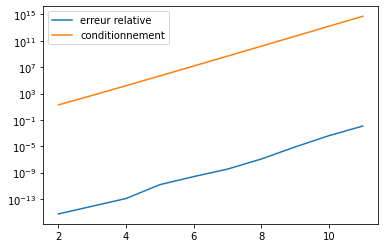

In [17]:
err_rel,conditionnement=np.zeros(10),np.zeros(10)
i=0
for n in range(2,12):
    x=np.ones(n)
    H=linalg.hilbert(n)
    conditionnement[i]=np.linalg.cond(H,2)
    b=np.dot(H,x)
    xh=np.linalg.solve(H,b)
    err_rel[i]=np.linalg.norm(xh-x)/np.linalg.norm(x)
    i=i+1
plt.semilogy(np.arange(2,12),err_rel,label='erreur relative')
plt.semilogy(np.arange(2,12),conditionnement,label='conditionnement')
plt.legend()

On observe que l'erreur numérique est proportionnelle au conditionnement du problème résolu (donné ici par le conditionnement de la matrice).